## K-Means for Compression

In [2]:
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Shape of the Image :  (450, 900, 3)


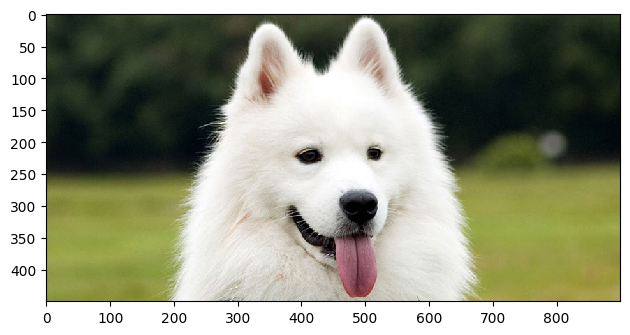

In [3]:
##**** Read the image 1 : dog.png ***##
OrigImage = io.imread('dog.png')
io.imshow(OrigImage);
print('Shape of the Image : ', OrigImage.shape)


In [3]:
##**** Reshape the image : convert the image into a vector BUT here each element of the vector is in 3D (RGB) ***##
rows, cols = OrigImage.shape[0], OrigImage.shape[1]
image = OrigImage.reshape(rows * cols, 3)
print(image.shape)
print(image[:4])

(405000, 3)
[[62 74 50]
 [61 73 49]
 [60 72 48]
 [58 70 46]]


In [4]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
model=kMeans.fit(image)

##**** Observe examples of Centeroids in RGB domain (3D) ***##
centers = np.asarray(model.cluster_centers_, dtype = np.uint8)
#centers

In [5]:
# labels 
labels = np.asarray(model.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
#labels

(405000,)
(450, 900)


(450, 900, 3)

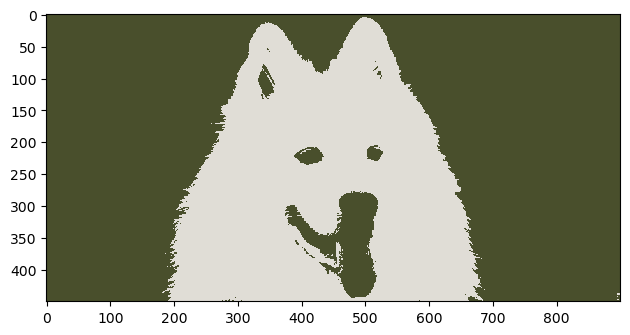

In [6]:
##**** Reconstruction of the image based on the segmentation obtained with K-means ***##
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # Assignment of every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave('dog-compressed.png', newImage);
io.imshow(newImage);
newImage.shape

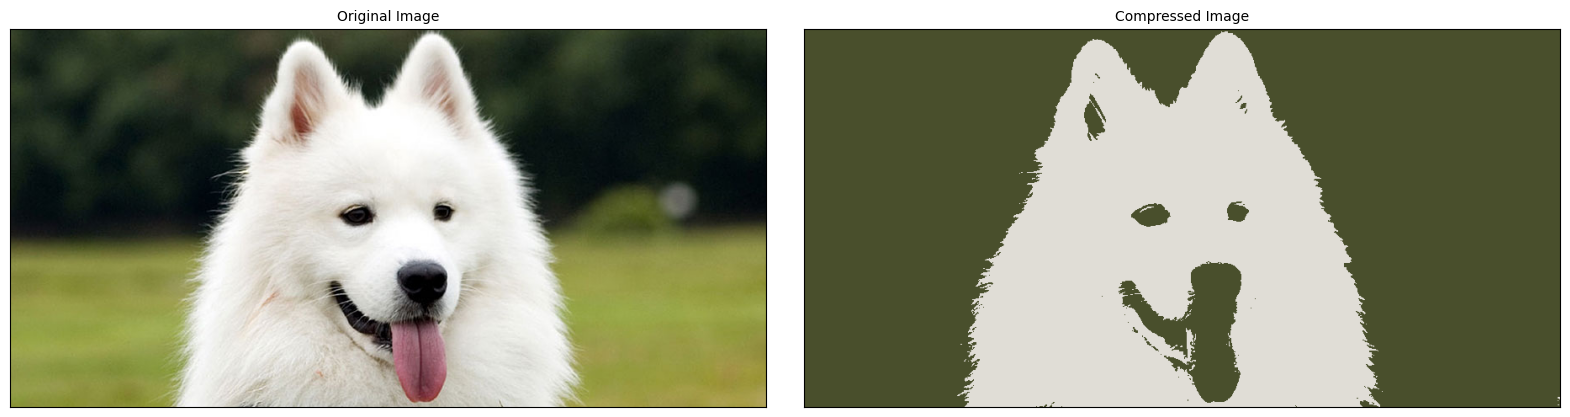

In [7]:
##**** Display the original and the compressed images side-by-side for a better comparion ***##
##**** Compare with different values of k clusters ***##

fig, ax = plt.subplots(1, 2, figsize=(20, 10),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(OrigImage)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(newImage)
ax[1].set_title('Compressed Image', size=10);